In [1]:
#importações das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from scipy import stats
import json

In [2]:
#importação das planilhas csv para serem dataframes
df100 = pd.read_csv("dataset_sudeste_simples_realista_outliers-100.csv")

In [3]:
df100.columns.tolist() #listar colunas de tabela de 100 linhas

['id', 'idade', 'renda', 'cidade', 'categoria', 'nota', 'feedback']

In [4]:
# Tratamento de NaN(nulos) - converter para 0 - tabela de 100 linhas
df100['idade'] = df100['idade'].fillna(0)
df100['renda'] = df100['renda'].fillna(0)
df100['cidade'] = df100['cidade'].fillna(0)
df100['categoria'] = df100['categoria'].fillna(0)
df100['nota'] = df100['nota'].fillna(0)
df100['feedback'] = df100['feedback'].fillna(0)

In [5]:
#feedbackisualização de tabela tratada de 100 linhas
display(df100.head(100))

,id,idade,renda,cidade,categoria,nota,feedback
0,1,41.0,7581.61,Rio de Janeiro,B,8.4,Ruim
1,2,38.0,8626.87,Belo Horizonte,A,2.2,Ruim
2,3,65.0,7742.99,São Paulo,A,1.2,Bom
3,4,59.0,6357.36,Vitória,B,9.5,Ruim
4,5,63.0,11899.30,Vitória,A,1.2,Bom
...,...,...,...,...,...,...,...
95,96,51.0,9112.51,Belo Horizonte,A,5.9,Regular
96,97,37.0,6098.80,Belo Horizonte,B,2.0,Regular
97,98,18.0,11708.21,Rio de Janeiro,B,5.7,Ruim
98,99,29.0,3429.34,Vitória,B,8.0,Regular


In [6]:
# Média, mínimo, máximo, quartis, margem de erro, contagem

print("\n### Descrição Estatística 100###")
print(df100.describe())


### Descrição Estatística 100###
               id       idade         renda        nota
count  100.000000  100.000000    100.000000  100.000000
mean    50.500000   43.640000   6824.041500    4.752000
std     29.011492   16.458408   3228.195966    2.884493
min      1.000000    0.000000      0.000000    0.000000
25%     25.750000   31.500000   4019.375000    2.175000
50%     50.500000   43.000000   6256.895000    4.900000
75%     75.250000   58.250000   9294.100000    7.100000
max    100.000000   70.000000  12964.100000    9.600000


In [7]:
# Cálculos Estatísticos de idade

media_idade100 = sum(df100['idade'])/len(df100['idade'])
mediana_idade100 = df100['idade'].median()
desvio_padrao_idade100 = df100['idade'].std()
maximo_idade100 = df100['idade'].max()
minimo_idade100 = df100['idade'].min()

print('Média de Idade - 100 Elementos:',round(media_idade100,0))
print('Mediana de Idade - 100 Elementos:',round(mediana_idade100,0))
print('Desvio Padrão de Idade - 100 Elementos:',round(desvio_padrao_idade100,0))
print('Maior Valor de Idade - 100 Elementos:',round(maximo_idade100,0))
print('Menor Valor de Idade - 100 Elementos:',round(minimo_idade100,0))

Média de Idade - 100 Elementos: 44.0
Mediana de Idade - 100 Elementos: 43.0
Desvio Padrão de Idade - 100 Elementos: 16.0
Maior Valor de Idade - 100 Elementos: 70.0
Menor Valor de Idade - 100 Elementos: 0.0


In [8]:
# Cálculos Estatísticos de renda

media_renda100 = sum(df100['renda'])/len(df100['renda'])
mediana_renda100 = df100['renda'].median()
desvio_padrao_renda100 = df100['renda'].std()
maximo_renda100 = df100['renda'].max()
minimo_renda100 = df100['renda'].min()

print('Média de Renda - 100 Elementos:',round(media_renda100,2))
print('Mediana de Renda - 100 Elementos:',round(mediana_renda100,2))
print('Desvio Padrão de Renda - 100 Elementos:',round(desvio_padrao_renda100,2))
print('Maior Valor de Renda - 100 Elementos:',round(maximo_renda100,2))
print('Menor Valor de Renda - 100 Elementos:',round(minimo_renda100,2))

Média de Renda - 100 Elementos: 6824.04
Mediana de Renda - 100 Elementos: 6256.9
Desvio Padrão de Renda - 100 Elementos: 3228.2
Maior Valor de Renda - 100 Elementos: 12964.1
Menor Valor de Renda - 100 Elementos: 0.0


In [9]:
# Cálculos Estatísticos de nota

media_nota100 = sum(df100['nota'])/len(df100['nota'])
mediana_nota100 = df100['nota'].median()
desvio_padrao_nota100 = df100['nota'].std()
maximo_nota100 = df100['nota'].max()
minimo_nota100 = df100['nota'].min()

print('Média de Nota - 100 Elementos:',round(media_nota100,2))
print('Mediana de Nota - 100 Elementos:',round(mediana_nota100,2))
print('Desvio Padrão de Nota - 100 Elementos:',round(desvio_padrao_nota100,2))
print('Maior Valor de Nota - 100 Elementos:',round(maximo_nota100,2))
print('Menor Valor de Nota - 100 Elementos:',round(minimo_nota100,2))

Média de Nota - 100 Elementos: 4.75
Mediana de Nota - 100 Elementos: 4.9
Desvio Padrão de Nota - 100 Elementos: 2.88
Maior Valor de Nota - 100 Elementos: 9.6
Menor Valor de Nota - 100 Elementos: 0.0


In [10]:
#Calculando o IQR e identificando os limites - Renda

Q1_renda100 = df100['renda'].quantile(0.25)
Q3_renda100 = df100['renda'].quantile(0.75)
IQR_renda100 = Q3_renda100 - Q1_renda100
limite_inferior_renda100 = Q1_renda100 - 1.5 * IQR_renda100
limite_superior_renda100 = Q3_renda100 + 1.5 * IQR_renda100

print (f"\n\n\t IQR - Campo Renda - 100\n\n")
print(f"Quartis -> Q1: {Q1_renda100:-8.2f}  ->  Q3: {Q3_renda100:-8.2f}")
print(f"IQR ----- {IQR_renda100}")
print(f"Limites - Inf: {limite_inferior_renda100:-8.2f}  -> Sup: {limite_superior_renda100:-8.2f}")



	 IQR - Campo Renda - 100


Quartis -> Q1:  4019.38  ->  Q3:  9294.10
IQR ----- 5274.7249999999985
Limites - Inf: -3892.71  -> Sup: 17206.19


In [11]:
#Calculando o IQR e identificando os limites - Idade

Q1_idade100 = df100['idade'].quantile(0.25)
Q3_idade100 = df100['idade'].quantile(0.75)
IQR_idade100 = Q3_idade100 - Q1_idade100
limite_inferior_idade100 = Q1_idade100 - 1.5 * IQR_idade100
limite_superior_idade100 = Q3_idade100 + 1.5 * IQR_idade100

print (f"\n\n\t IQR - Campo Idade - 100\n\n")
print(f"Quartis -> Q1: {Q1_idade100:-8.2f}  ->  Q3: {Q3_idade100:-8.2f}")
print(f"IQR ----- {IQR_idade100}")
print(f"Limites - Inf: {limite_inferior_idade100:-8.2f}  -> Sup: {limite_superior_idade100:-8.2f}")



	 IQR - Campo Idade - 100


Quartis -> Q1:    31.50  ->  Q3:    58.25
IQR ----- 26.75
Limites - Inf:    -8.62  -> Sup:    98.38


In [12]:
#Calculando o IQR e identificando os limites - Nota

Q1_nota100 = df100['nota'].quantile(0.25)
Q3_nota100 = df100['nota'].quantile(0.75)
IQR_nota100 = Q3_nota100 - Q1_nota100
limite_inferior_nota100 = Q1_nota100 - 1.5 * IQR_nota100
limite_superior_nota100 = Q3_nota100 + 1.5 * IQR_nota100

print (f"\n\n\t IQR - Campo Nota - 100\n\n")
print(f"Quartis -> Q1: {Q1_nota100:-8.2f}  ->  Q3: {Q3_nota100:-8.2f}")
print(f"IQR ----- {IQR_nota100}")
print(f"Limites - Inf: {limite_inferior_nota100:-8.2f}  -> Sup: {limite_superior_nota100:-8.2f}")



	 IQR - Campo Nota - 100


Quartis -> Q1:     2.18  ->  Q3:     7.10
IQR ----- 4.924999999999999
Limites - Inf:    -5.21  -> Sup:    14.49


In [13]:
#Outliers Renda

outliers_renda100 = df100[(df100['renda'] < limite_inferior_renda100) | (df100['renda'] > limite_superior_renda100)]
print(f"\n### Possíveis Outliers em 'renda' - 100 Elementos###\n\n{outliers_renda100}\n\n\n")


### Possíveis Outliers em 'renda' - 100 Elementos###

Empty DataFrame
Columns: [id, idade, renda, cidade, categoria, nota, feedback]
Index: []





In [14]:
#Outliers Idade

outliers_idade100 = df100[(df100['idade'] < limite_inferior_idade100) | (df100['idade'] > limite_superior_idade100)]
print(f"\n### Possíveis Outliers em 'idade' - 100 Elementos###\n\n{outliers_idade100}\n\n\n")


### Possíveis Outliers em 'idade' - 100 Elementos###

Empty DataFrame
Columns: [id, idade, renda, cidade, categoria, nota, feedback]
Index: []





In [15]:
#Outliers Nota

outliers_nota100 = df100[(df100['nota'] < limite_inferior_nota100) | (df100['nota'] > limite_superior_nota100)]
print(f"\n### Possíveis Outliers em 'nota' - 100 Elementos###\n\n{outliers_nota100}\n\n\n")


### Possíveis Outliers em 'nota' - 100 Elementos###

Empty DataFrame
Columns: [id, idade, renda, cidade, categoria, nota, feedback]
Index: []





In [17]:
#Conversão da planilha tratada para csv
df100.to_csv('Simples_Realista_100_Tratado.csv', index=False)

In [18]:
# Converter para lista de dicionários (documentos MongoDB)
dados_mongo100 = df100.to_dict(orient='records')

# Salvar como JSON
with open('dados_mongo_Simples_Realista_100.json', 'w', encoding='utf-8') as f:
    json.dump(dados_mongo100, f, ensure_ascii=False, indent=2)

print("Arquivo salvo com sucesso para importação no MongoDB Atlas - 100 linhas!")

Arquivo salvo com sucesso para importação no MongoDB Atlas - 100 linhas!


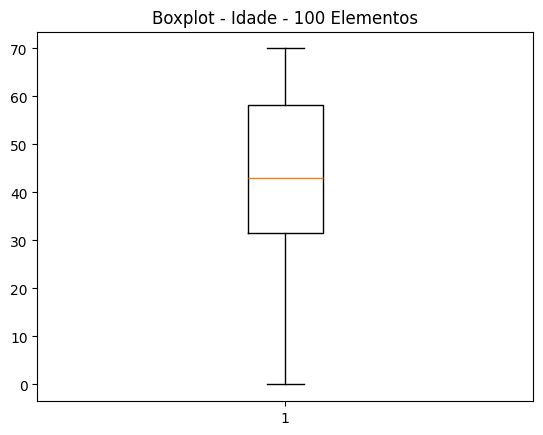

In [19]:
#Geração Gráfico - Idade - 100 linhas
plt.boxplot(df100['idade'])
plt.title("Boxplot - Idade - 100 Elementos")
plt.show()

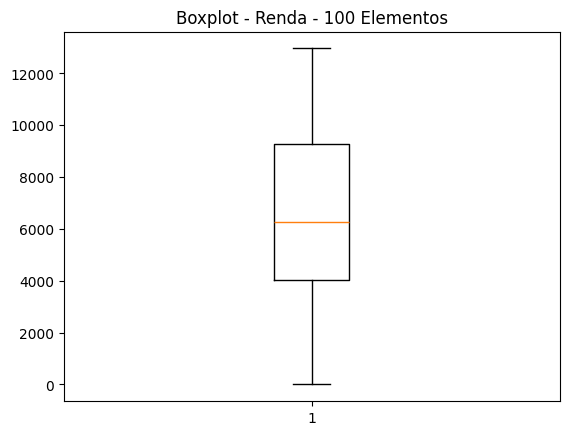

In [20]:
#Geração Gráfico - Renda - 100 linhas
plt.boxplot(df100['renda'])
plt.title("Boxplot - Renda - 100 Elementos")
plt.show()

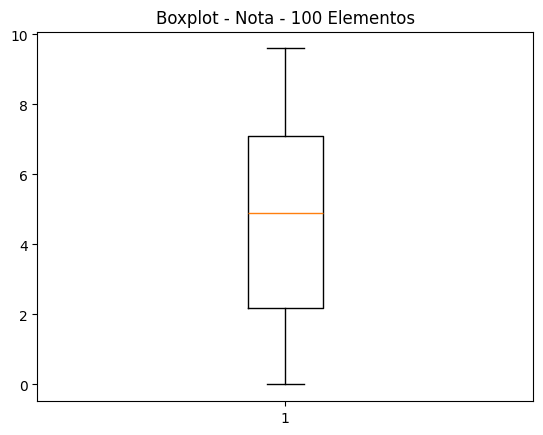

In [21]:
#Geração Gráfico - Nota - 100 linhas
plt.boxplot(df100['nota'])
plt.title("Boxplot - Nota - 100 Elementos")
plt.show()